# CS724: Assignment 2
### Krishanu Ray, 241110037
<hr>

## Question 2(b)
I have collected accelerometer samples of me starting from lying straight to sitting to standing up in that order. I have plotted the graph below.

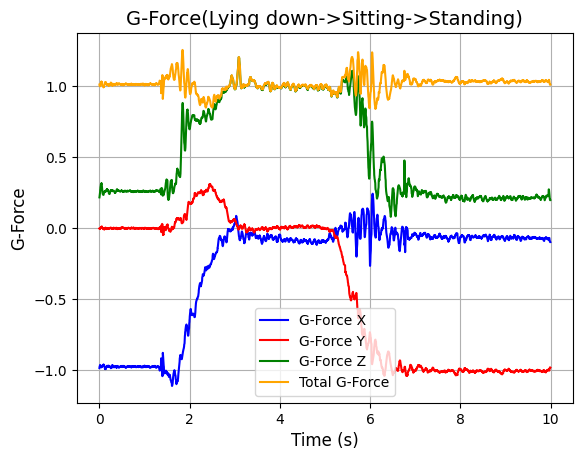

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'random.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

plt.plot(df['time'], df['gFx'], label='G-Force X', color='blue')
plt.plot(df['time'], df['gFy'], label='G-Force Y', color='red')
plt.plot(df['time'], df['gFz'], label='G-Force Z', color='green')
plt.plot(df['time'], df['TgF'], label='Total G-Force', color='orange')

# Adding labels and title
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('G-Force', fontsize=12)
plt.title('G-Force(Lying down->Sitting->Standing)', fontsize=14)

# Adding a grid and a legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

<hr>

Now I will try to predict my posture based on the accelerometer readings along X,Y and Z axis. To do this I will use the folowing observations from graph:
1) When stationary, the total G*force is close to 1, so I can check if my sample has a total G-force reading at some large deviation from 1 (>1.100 or <0.900) then I can conclude there is some movement
2) To detect lying down case, absolute value of X is close to 1(<1.100 and >0.900) and Y,Z values are close to 0(<0.400)
3) To detect sitting case, absolute value of Z is close to 1(<1.100 and >0.900) and X,Y values are close to 0(<0.400)
4) To detect standing case, absolute value of Y is close to 1(<1.100 and >0.900) and X,Z values are close to 0(<0.400)

Since the csv file contains too many values, I will use every 100th sample to predict this



In [31]:
#Function to check lying down
def isLyindDown(x,y,z):
    if(abs(x)>0.900 and abs(x)<1.100 and abs(y)<0.400 and abs(z)<0.400):
        return True
    else:
        return False
#Function to check sitting
def isSitting(x,y,z):
    if(abs(z)>0.900 and abs(z)<1.100 and abs(x)<0.400 and abs(y)<0.400):
        return True
    else:
        return False
 #Function to check standing   
def isStanding(x,y,z):
    if(abs(y)>0.900 and abs(y)<1.100 and abs(x)<0.400 and abs(z)<0.400):
        return True
    else:
        return False

#Iterating over every row
for row in df.itertuples():
    if(row.Index%100==0):
        dev_tot = abs(row.TgF)
        if(dev_tot<0.900 or dev_tot>1.100):
            print(f"At {row.time}, total g-force is {row.TgF}. Heavy movement detected")
        else:
            if(isLyindDown(row.gFx,row.gFy,row.gFz)):
                print(f"At {row.time}, Lying down straight")
            elif(isSitting(row.gFx,row.gFy,row.gFz)):
                print(f"At {row.time}, sitting")
            elif(isStanding(row.gFx,row.gFy,row.gFz)):
                print(f"At {row.time}, standing")
            else:
                print(f"At {row.time}, unable to predict")
    

At 0.00398923, Lying down straight
At 0.231783384, Lying down straight
At 0.473174154, Lying down straight
At 0.705084307, Lying down straight
At 0.940996, Lying down straight
At 1.179730769, Lying down straight
At 1.411699461, unable to predict
At 1.648363077, Lying down straight
At 1.889079769, unable to predict
At 2.119933308, unable to predict
At 2.355839077, total g-force is 0.85. Heavy movement detected
At 2.591629923, unable to predict
At 2.827735154, sitting
At 3.06422, sitting
At 3.300991385, sitting
At 3.535580692, sitting
At 3.771411154, sitting
At 4.008462461, sitting
At 4.244075461, sitting
At 4.479161538, sitting
At 4.718650846, sitting
At 4.953537615, sitting
At 5.188645231, sitting
At 5.444288, sitting
At 5.658822846, unable to predict
At 5.894799692, total g-force is 1.141. Heavy movement detected
At 6.131074462, total g-force is 0.865. Heavy movement detected
At 6.366990539, standing
At 6.603138231, standing
At 6.839003462, standing
At 7.075032077, standing
At 7.31214